What is Drop Out?

This is a technique that will help your model generalize and prevent overfitting. So how does it work? Well, all you are going to do is while training, you are going to literally shoot down a percentage of your Neurons. On every iteration you are going to shoot down at random a percentage of your neurons. This will prevent your model from getting too cozy with your data and ultimately help you overcome any overfitting issues.

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

Testing data points: (150, 1)
Validation data points: (150, 1)
Training data points: (700, 1)


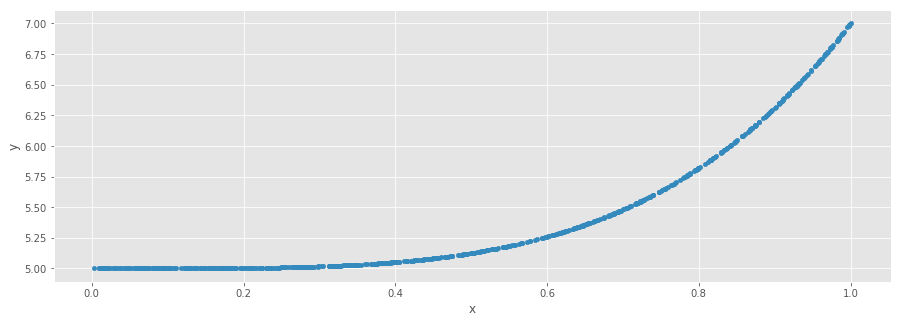

In [2]:
# Function to model

# y = a * x^4 + b 

# Training - 70%
# Validation - 15%
# Test - 15%



# Let's generate 1000 random samples
pool = np.random.rand(1000,1).astype(np.float32)

# Shuffle the samples
np.random.shuffle(pool)

# sample size of 15%
sample = int(1000 * 0.15)

# 15% test
test_x = pool[0:sample]

# 15% validation
valid_x = pool[sample:sample*2]

# 70% training
train_x = pool[sample*2:]

print('Testing data points: ' + str(test_x.shape))
print('Validation data points: ' + str(valid_x.shape))
print('Training data points: ' + str(train_x.shape))

# Let's compute the ouput using 2 for a, 5 for b
test_y = 2.0 * test_x**4 + 5
valid_y = 2.0 * valid_x**4 + 5
train_y = 2.0 * train_x**4 + 5

df = pd.DataFrame({'x':train_x[:,0],
                   'y':train_y[:,0]})
df.head()

df.describe()

df.plot.scatter(x='x', y='y', figsize=(15,5));

In [3]:
print(train_x.shape[1])
print(train_y.shape[1])

1
1


In [4]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    
    # tf.random_normal([what is the size of your batches, size of output layer])
    Weights = tf.Variable(tf.truncated_normal([in_size, out_size], mean=0.1, stddev=0.1))
    
    # tf.random_normal([size of output layer])
    biases = tf.Variable(tf.truncated_normal([out_size], mean=0.1, stddev=0.1))
    
    # shape of pred = [size of your batches, size of output layer]
    pred = tf.matmul(inputs, Weights) + biases

    if activation_function is None:
        outputs = pred
    else:
        outputs = activation_function(pred)
    return outputs

shape of x and y:
(?, 1) (?, 1)
Hidden layer neuron:  5
shape of hidden layers:
(?, 5) (?, 5) (?, 5) (?, 5)
shape of output layer:
(?, 1)
Session ready to run...
Training loss at step 0: 27.330988 
Validation 27.233486
Training loss at step 100: 7.586712 
Validation 7.325852
Training loss at step 200: 0.474872 *
Validation 0.218306
Training loss at step 300: 0.403168 *
Validation 0.207240
Training loss at step 400: 0.366084 *
Validation 0.201588
Training loss at step 500: 0.425363 *
Validation 0.195113
Training loss at step 600: 0.388430 *
Validation 0.189865
Training loss at step 700: 0.384717 *
Validation 0.183980
Training loss at step 800: 0.362496 *
Validation 0.178217
Training loss at step 900: 0.349402 *
Validation 0.172669
Training loss at step 1000: 0.347514 *
Validation 0.167387
Training loss at step 1100: 0.357656 *
Validation 0.161896
Training loss at step 1200: 0.338601 
Validation 0.156961
Training loss at step 1300: 0.367306 
Validation 0.151744
Training loss at step 1400

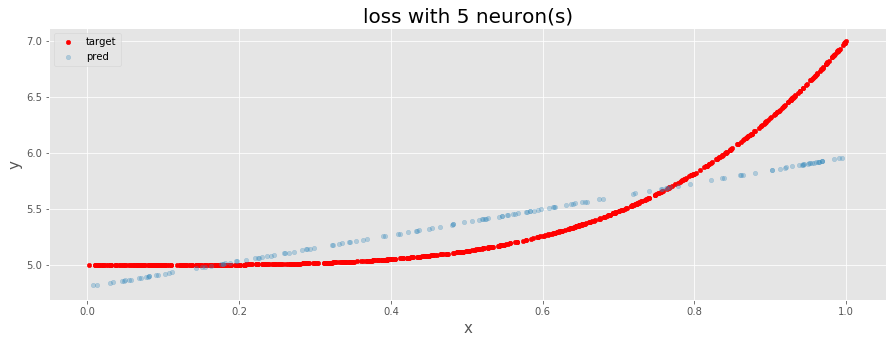

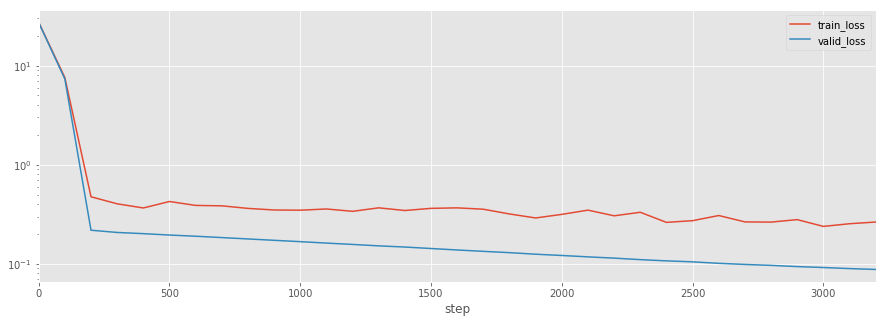

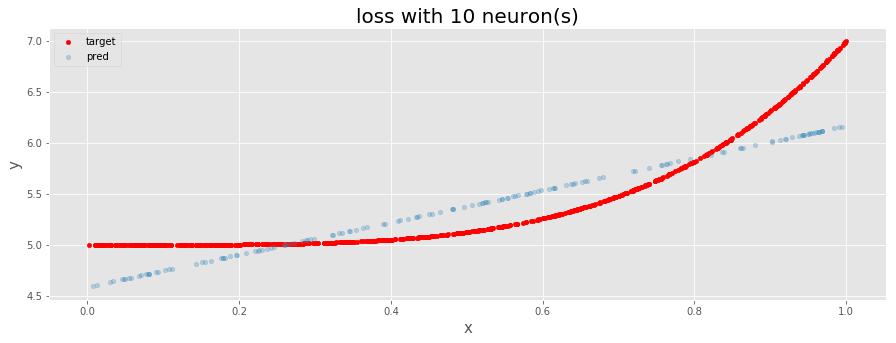

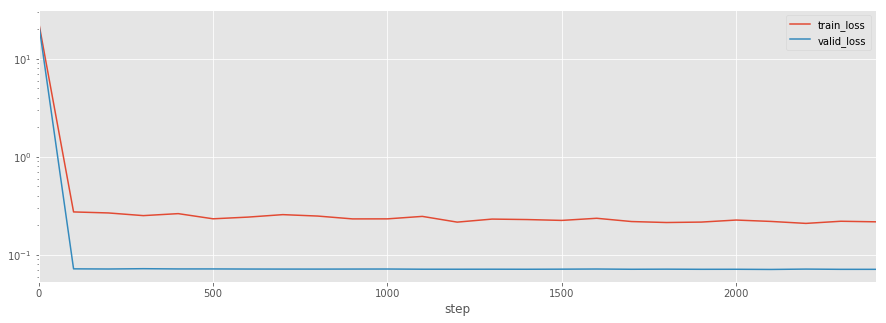

In [8]:
epoch = 10000

# hidden layer neuron no or nodes
hs = [5, 10]
for hidden_size in hs:

    # placeholders
    # shape=[how many samples do you have, how many input neurons]
    x = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]], name="01_x")
    y = tf.placeholder(tf.float32, shape=[None, train_y.shape[1]], name="01_y")

    print("shape of x and y:")
    print(x.get_shape(),y.get_shape())

    print("Hidden layer neuron: ", hidden_size)
    
    # drop out
    keep_prob = tf.placeholder(tf.float32)

    # create your hidden layers!
    h1 = add_layer(x, 1, hidden_size, tf.nn.relu)
    h1_drop = tf.nn.dropout(h1, keep_prob)
    
    #add a second layer
    h2 = add_layer(h1_drop, hidden_size, hidden_size, tf.nn.relu)
    h2_drop = tf.nn.dropout(h2, keep_prob)

    # add a third layer
    h3 = add_layer(h2_drop, hidden_size, hidden_size, tf.nn.relu)
    h3_drop = tf.nn.dropout(h3, keep_prob)

    # add a fourth layer
    h4 = add_layer(h3_drop, hidden_size, hidden_size, tf.nn.relu)
    h4_drop = tf.nn.dropout(h4, keep_prob)

    print("shape of hidden layers:")
    print(h1_drop.get_shape(), h2_drop.get_shape(), h3_drop.get_shape(), h4_drop.get_shape())

    # Output Layers
    pred = add_layer(h4_drop, hidden_size, 1)

    print("shape of output layer:")
    print(pred.get_shape())

    # minimize the mean squared errors.
    loss = tf.reduce_mean(tf.square(pred - y))

    # pick optimizer
    optimizer = tf.train.GradientDescentOptimizer(0.001)
    train = optimizer.minimize(loss)

    # check accuracy of model
    correct_prediction = tf.equal(tf.round(pred), tf.round(y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    
    # Best validation accuracy seen so far.
    best_valid_acc = 0.0

    # Iteration-number for last improvement to validation accuracy.
    last_improvement = 0

    # Stop optimization if no improvement found in this many iterations.
    require_improvement = 1500
    
    # initialize the variables
    init = tf.global_variables_initializer()

    # hold step and error values
    t = []

    # Run your graph
    with tf.Session() as sess:
        print("Session ready to run...")
        # initialize variables
        sess.run(init)

        # Fit the function.
        for step in range(epoch):

            # get your data
            train_data = {x:train_x, y:train_y, keep_prob: 0.975}
            valid_data = {x:valid_x, y:valid_y, keep_prob: 1.0}
            test_data = {x:test_x, y:test_y, keep_prob: 1.0}

            # training in progress...
            train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        

            # print every n iterations
            if step%100==0:

                # capture the step and error for analysis
                valid_loss = sess.run(loss, feed_dict=valid_data) 
                t.append((step, train_loss, valid_loss))   

                # get snapshot of current training accuracy       
                train_acc = accuracy.eval(train_data)
                valid_acc = accuracy.eval(valid_data) 
                
                # If validation accuracy is an improvement over best-known.
                if valid_acc > best_valid_acc:
                    # Update the best-known validation accuracy.
                    best_valid_acc = valid_acc

                    # Set the iteration for the last improvement to current.
                    last_improvement = step

                    # Flag when ever an improvement is found
                    improved_str = '*'
                else:
                    # An empty string to be printed below.
                    # Shows that no improvement was found.
                    improved_str = ''   

                print("Training loss at step %d: %f %s" % (step, train_loss, improved_str))        
                print("Validation %f" % (valid_loss))            

                # If no improvement found in the required number of iterations.
                if step - last_improvement > require_improvement:
                    print("No improvement found in a while, stopping optimization.")

                    # Break out from the for-loop.
                    break                

        # here is where you see how good of a Data Scientist you are        
        print("Accuracy on the Training Set:", accuracy.eval(train_data) )
        print("Accuracy on the Validation Set:", accuracy.eval(valid_data) )
        print("Accuracy on the Test Set:", accuracy.eval(test_data) )

        # capture predictions on test data 
        test_results = sess.run(pred, feed_dict={x:test_x, keep_prob: 1.0})  
        df_final = pd.DataFrame({'test_x':test_x[:,0],
                                 'pred':test_results[:,0]})

        # capture training and validation loss
        df_loss = pd.DataFrame(t, columns=['step', 'train_loss', 'valid_loss'])  

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

    # Chart 1 - Shows the line we are trying to model
    df.plot.scatter(x='x', y='y', ax=axes, color='red')

    # Chart 2 - Shows the line our trained model came up with
    gLabel = "target vs pred with " + str(hidden_size) + " neuron(s)"
    df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)
    # add a info to plot
    axes.set_title(gLabel, fontsize=20)
    axes.set_ylabel('y', fontsize=15)
    axes.set_xlabel('x', fontsize=15)
    axes.legend(["target", "pred"], loc='best');

    gLabel = "loss with " + str(hidden_size) + " neuron(s)"
    df_loss.set_index('step').plot(logy=True, figsize=(15,5))
    # add a info to plot
    axes.set_title(gLabel, fontsize=20)